In [1]:
import RNA
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



In [2]:
RY01_5utr = 'agaataaactagtattcttctggtccccacagactcagagagaacccgccacc'.upper()
RY01_3utr = 'gcatgcacgcaatgctagctgcccctttcccgtcctgggtaccccgagtctcccccgacctcgggtcccaggtatgctcccacctccacctgccccactcaccacctctgctagttccagacacctcccaagcacgcagcaatgcagctcaaaacgcttagcctagccacacccccacgggaaacagcagtgattaacctttagcaataaacgaaagtttaactaagctatactaaccccagggttggtcaatttcgtgccagccacaccctggagctag'.upper()
RY07_5utr = 'ggcaaaaatcaaaatcaatcatcatcacaacatcaacaatcaatcatcaacacatcatcaagacaccacc'.upper()
RY07_3utr = 'ctcgagctggtactgcatgcttgtgtatgcgttaataaaaagaaggaactcgtaaaaactcaatgtatttctgaggaagcgtggtgcataatgccacgcagcgtctgcataacttttattatttcttttattaatcaacaaaccagccacaccctggagctagc'.upper()

In [5]:
utr_475 = pd.read_excel('./UTR_sequences/round_1_screening_475_UTR_sequences.xlsx', sheet_name='CDD Export 1')
utr_475["5' UTR"] = utr_475["5' UTR"].fillna(RY01_5utr)
utr_475["3' UTR"] = utr_475["3' UTR"].fillna(RY01_3utr)
utr_475

,Projects,RVAC ID,5' UTR,3' UTR
0,UML,RV-UML-m001,AGGGCGAAGAAACGTTAACGAGTATTTCAATTATTAGAGAGTTCAT...,GCATGCACGCAATGCTAGCTGCCCCTTTCCCGTCCTGGGTACCCCG...
1,UML,RV-UML-m002,AGGTCCGTTATATTATTTATCTTGCAGATCAAACTTCAGAGAGGAG...,GCATGCACGCAATGCTAGCTGCCCCTTTCCCGTCCTGGGTACCCCG...
2,UML,RV-UML-m003,AGTTTCGTTCACTGTCCTTGACTAGAGAATATAATAAAAAGATTGT...,GCATGCACGCAATGCTAGCTGCCCCTTTCCCGTCCTGGGTACCCCG...
3,UML,RV-UML-m004,AGGGACCAAGAGTTCGATACCTCATCGAACTGCGAGTCATAAGCAG...,GCATGCACGCAATGCTAGCTGCCCCTTTCCCGTCCTGGGTACCCCG...
4,UML,RV-UML-m005,AGTGGACTTGTTATCTCGCATTTGCGCAATCCACTATACTGCGTTG...,GCATGCACGCAATGCTAGCTGCCCCTTTCCCGTCCTGGGTACCCCG...
...,...,...,...,...
470,UML,RV-UML-m471,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,AGGCTGGATCTTGGAGAATGTGAGAAGCCAGCCAGAGGCATCTGAG...
471,UML,RV-UML-m472,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,ACACAAAGCCTCGAAATCAGTGCGCTCCAGCTGATCTCGTTCCGCC...
472,UML,RV-UML-m473,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,AACCTCCCACTTTGTCTGTACATACTGGCCTCTGTGATTACATAGA...
473,UML,RV-UML-m474,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,GGCACCCCCAGGACAGCACACGGTGAGGGTGCGGGGCCTGCAGGCC...


In [11]:
utr_luci = pd.read_excel('./UTR_sequences/luciferase_screening_summary_log2.xlsx', sheet_name='screening_summary_log2')
print(utr_luci.shape)
utr_luci = pd.merge(utr_luci, utr_475, left_on = 'rvac_ID', right_on = 'RVAC ID')
print(utr_luci.shape)
utr_475['exists_in_utr_luci'] = utr_475['RVAC ID'].isin(utr_luci['RVAC ID'])
print(Counter(utr_475['exists_in_utr_luci']))
utr_luci

(8620, 22)
(6160, 27)
Counter({True: 467, False: 8})


,rvac_ID,Molecule,Batch_date,Plate,Time Points(h),Dosage (ng),source,RLU_AVG,RLU_SD,RLU_CV,...,RY01_FC_Raw,cds,Cell_Line,note,Description,Projects,RVAC ID,5' UTR,3' UTR,exists_in_utr_luci
0,RV-UML-m379,379,20221021,18,48,6.25,NaN,12960,2480,0.19,...,162.00,Luciferase,HepG2,NaN,"3'UTR Half-life endogenous, ENST00000355725",UML,RV-UML-m379,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,TGAAGACTTTCCATCAAGGTAATGCACTTAATGCTTTATGTGAGAT...,True
1,RV-UML-m390,390,20221021,18,48,6.25,NaN,9820,2900,0.30,...,122.75,Luciferase,HepG2,NaN,"3'UTR Half-life endogenous, ENST00000317459",UML,RV-UML-m390,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,AATATTAATTTATAAAAAAGAAATTTTAAAAAGTAACAAGAAAGAA...,True
2,RV-UML-m392,392,20221021,18,48,6.25,NaN,10060,1100,0.11,...,125.75,Luciferase,HepG2,NaN,"3'UTR Half-life endogenous, ENST00000377351",UML,RV-UML-m392,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,CCCCGTCTGCTCCTCTAGGCTGGCCCCTTGTCCACCCCTCTCCACA...,True
3,RV-UML-m381,381,20221021,18,48,6.25,NaN,6880,280,0.04,...,86.00,Luciferase,HepG2,NaN,"3'UTR Half-life endogenous, ENST00000348547",UML,RV-UML-m381,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,TCACCCTCGGTGCTTCCTCTGTCTCCTCTTTCTCCCTGGCCTGTGG...,True
4,RV-UML-m386,386,20221021,18,48,6.25,NaN,6820,900,0.13,...,85.25,Luciferase,HepG2,NaN,"3'UTR Half-life endogenous, ENST00000356839",UML,RV-UML-m386,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,ATACTCCCGGCCAGGGCCTGTCCCAGTTATGTGCCTTCCCTCAAGC...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,RV-UML-m213,213,20221007,1,16,6.25,NaN,100,20,0.20,...,0.01,Luciferase,C2C12,NaN,S100A12-5UTR + BCL2L2-PABPN1-3UTR,UML,RV-UML-m213,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...,AAAAAGTGTGTATTAGGAGGAGAGAGAGGAAAAAAAGAGGAAA,True
6156,RV-UML-m213,213,20221007,9,48,12.50,NaN,40,0,0.00,...,0.01,Luciferase,C2C12,NaN,S100A12-5UTR + BCL2L2-PABPN1-3UTR,UML,RV-UML-m213,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...,AAAAAGTGTGTATTAGGAGGAGAGAGAGGAAAAAAAGAGGAAA,True
6157,RV-UML-m268,268,20221007,6,16,25.00,NaN,640,200,0.31,...,0.00,Luciferase,C2C12,NaN,CBSL-5UTR + ACY1-3UTR,UML,RV-UML-m268,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...,GCCCTGGAACTCCTAAACCTTTGCCCCTGGGGCTTCCATCCCAACC...,True
6158,RV-UML-m268,268,20221007,6,16,12.50,NaN,220,60,0.27,...,0.00,Luciferase,C2C12,NaN,CBSL-5UTR + ACY1-3UTR,UML,RV-UML-m268,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...,GCCCTGGAACTCCTAAACCTTTGCCCCTGGGGCTTCCATCCCAACC...,True


In [12]:
utr_luci.columns

Index(['rvac_ID', 'Molecule', 'Batch_date', 'Plate', 'Time Points(h)',
       'Dosage (ng)', 'source', 'RLU_AVG', 'RLU_SD', 'RLU_CV', 'RY07_RLU',
       'RY07_RLU_CV', 'RY07_FC_log2RLU', 'RY07_FC_Raw', 'RY01_RLU',
       'RY01_RLU_CV', 'RY01_FC_log2RLU', 'RY01_FC_Raw', 'cds', 'Cell_Line',
       'note', 'Description', 'Projects', 'RVAC ID', '5' UTR', '3' UTR',
       'exists_in_utr_luci'],
      dtype='object')

In [15]:
utr_luci.cds.unique(), utr_luci.Cell_Line.unique(), utr_luci['Time Points(h)'].unique(), utr_luci['Dosage (ng)'].unique()

(array(['Luciferase'], dtype=object),
 array(['HepG2', 'C2C12'], dtype=object),
 array([48, 16]),
 array([ 6.25 ,  3.125, 12.5  , 25.   ]))

In [36]:
# 假设utr_luci已经是一个加载好的DataFrame
# 1. 添加"class"列，合并4列信息
utr_luci['cell_type'] = (utr_luci['cds'].astype(str) + '-' + 
                     utr_luci['Cell_Line'].astype(str) + '-' + 
                     utr_luci['Time Points(h)'].astype(str) + '-' + 
                     utr_luci['Dosage (ng)'].astype(str))

# 2. 添加"full_sequence"列，合并5'UTR和3'UTR
# 注意：由于列名中含有特殊字符，我们使用中括号访问
utr_luci['sequence'] = utr_luci["5' UTR"].astype(str) + utr_luci["3' UTR"].astype(str)

# 3. 按照class列，9:1分成train/val
# 先初始化这些列为False
utr_luci['is_train'] = False
utr_luci['is_test'] = False  # 你要求添加is_test，尽管没有提到测试集
utr_luci['is_val'] = False

# 获取所有唯一的class值
unique_classes = utr_luci['cell_type'].unique()

# 对每个class进行划分
for cls in unique_classes:
    # 获取当前class的索引
    indices = utr_luci[utr_luci['cell_type'] == cls].index
    
    # 划分成训练集和验证集，比例为9:1
    train_indices, val_indices = train_test_split(indices, test_size=0.1, random_state=42)
    
    # 设置对应的标志
    utr_luci.loc[train_indices, 'is_train'] = True
    utr_luci.loc[val_indices, 'is_val'] = True

# 查看结果
print("处理后的DataFrame形状:", utr_luci.shape)

# 验证训练/验证集划分比例
train_count = utr_luci['is_train'].sum()
val_count = utr_luci['is_val'].sum()
total = len(utr_luci)

print(f"\n训练集大小: {train_count} ({train_count/total:.2%})")
print(f"验证集大小: {val_count} ({val_count/total:.2%})")
utr_luci

处理后的DataFrame形状: (6160, 34)

训练集大小: 5536 (89.87%)
验证集大小: 624 (10.13%)


,rvac_ID,Molecule,Batch_date,Plate,Time Points(h),Dosage (ng),source,RLU_AVG,RLU_SD,RLU_CV,...,5' UTR,3' UTR,exists_in_utr_luci,class,full_sequence,is_train,is_test,is_val,cell_type,sequence
0,RV-UML-m379,379,20221021,18,48,6.25,NaN,12960,2480,0.19,...,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,TGAAGACTTTCCATCAAGGTAATGCACTTAATGCTTTATGTGAGAT...,True,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,True,False,False,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...
1,RV-UML-m390,390,20221021,18,48,6.25,NaN,9820,2900,0.30,...,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,AATATTAATTTATAAAAAAGAAATTTTAAAAAGTAACAAGAAAGAA...,True,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,True,False,False,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...
2,RV-UML-m392,392,20221021,18,48,6.25,NaN,10060,1100,0.11,...,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,CCCCGTCTGCTCCTCTAGGCTGGCCCCTTGTCCACCCCTCTCCACA...,True,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,True,False,False,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...
3,RV-UML-m381,381,20221021,18,48,6.25,NaN,6880,280,0.04,...,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,TCACCCTCGGTGCTTCCTCTGTCTCCTCTTTCTCCCTGGCCTGTGG...,True,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,True,False,False,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...
4,RV-UML-m386,386,20221021,18,48,6.25,NaN,6820,900,0.13,...,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,ATACTCCCGGCCAGGGCCTGTCCCAGTTATGTGCCTTCCCTCAAGC...,True,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,True,False,False,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,RV-UML-m213,213,20221007,1,16,6.25,NaN,100,20,0.20,...,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...,AAAAAGTGTGTATTAGGAGGAGAGAGAGGAAAAAAAGAGGAAA,True,Luciferase-C2C12-16-6.25,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...,True,False,False,Luciferase-C2C12-16-6.25,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...
6156,RV-UML-m213,213,20221007,9,48,12.50,NaN,40,0,0.00,...,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...,AAAAAGTGTGTATTAGGAGGAGAGAGAGGAAAAAAAGAGGAAA,True,Luciferase-C2C12-48-12.5,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...,True,False,False,Luciferase-C2C12-48-12.5,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...
6157,RV-UML-m268,268,20221007,6,16,25.00,NaN,640,200,0.31,...,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...,GCCCTGGAACTCCTAAACCTTTGCCCCTGGGGCTTCCATCCCAACC...,True,Luciferase-C2C12-16-25.0,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...,True,False,False,Luciferase-C2C12-16-25.0,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...
6158,RV-UML-m268,268,20221007,6,16,12.50,NaN,220,60,0.27,...,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...,GCCCTGGAACTCCTAAACCTTTGCCCCTGGGGCTTCCATCCCAACC...,True,Luciferase-C2C12-16-12.5,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...,True,False,False,Luciferase-C2C12-16-12.5,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...


In [37]:
utr_luci.columns

Index(['rvac_ID', 'Molecule', 'Batch_date', 'Plate', 'Time Points(h)',
       'Dosage (ng)', 'source', 'RLU_AVG', 'RLU_SD', 'RLU_CV', 'RY07_RLU',
       'RY07_RLU_CV', 'RY07_FC_log2RLU', 'RY07_FC_Raw', 'RY01_RLU',
       'RY01_RLU_CV', 'RY01_FC_log2RLU', 'RY01_FC_Raw', 'cds', 'Cell_Line',
       'note', 'Description', 'Projects', 'RVAC ID', '5' UTR', '3' UTR',
       'exists_in_utr_luci', 'class', 'full_sequence', 'is_train', 'is_test',
       'is_val', 'cell_type', 'sequence'],
      dtype='object')

/tmp/ipykernel_802373/225378821.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=utr_luci['Time Points(h)'], palette='viridis')
/tmp/ipykernel_802373/225378821.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=utr_luci['Dosage (ng)'], palette='viridis')
/tmp/ipykernel_802373/225378821.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=utr_luci['cds'], palette='viridis')
/tmp/ipykernel_802373/225378821.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.

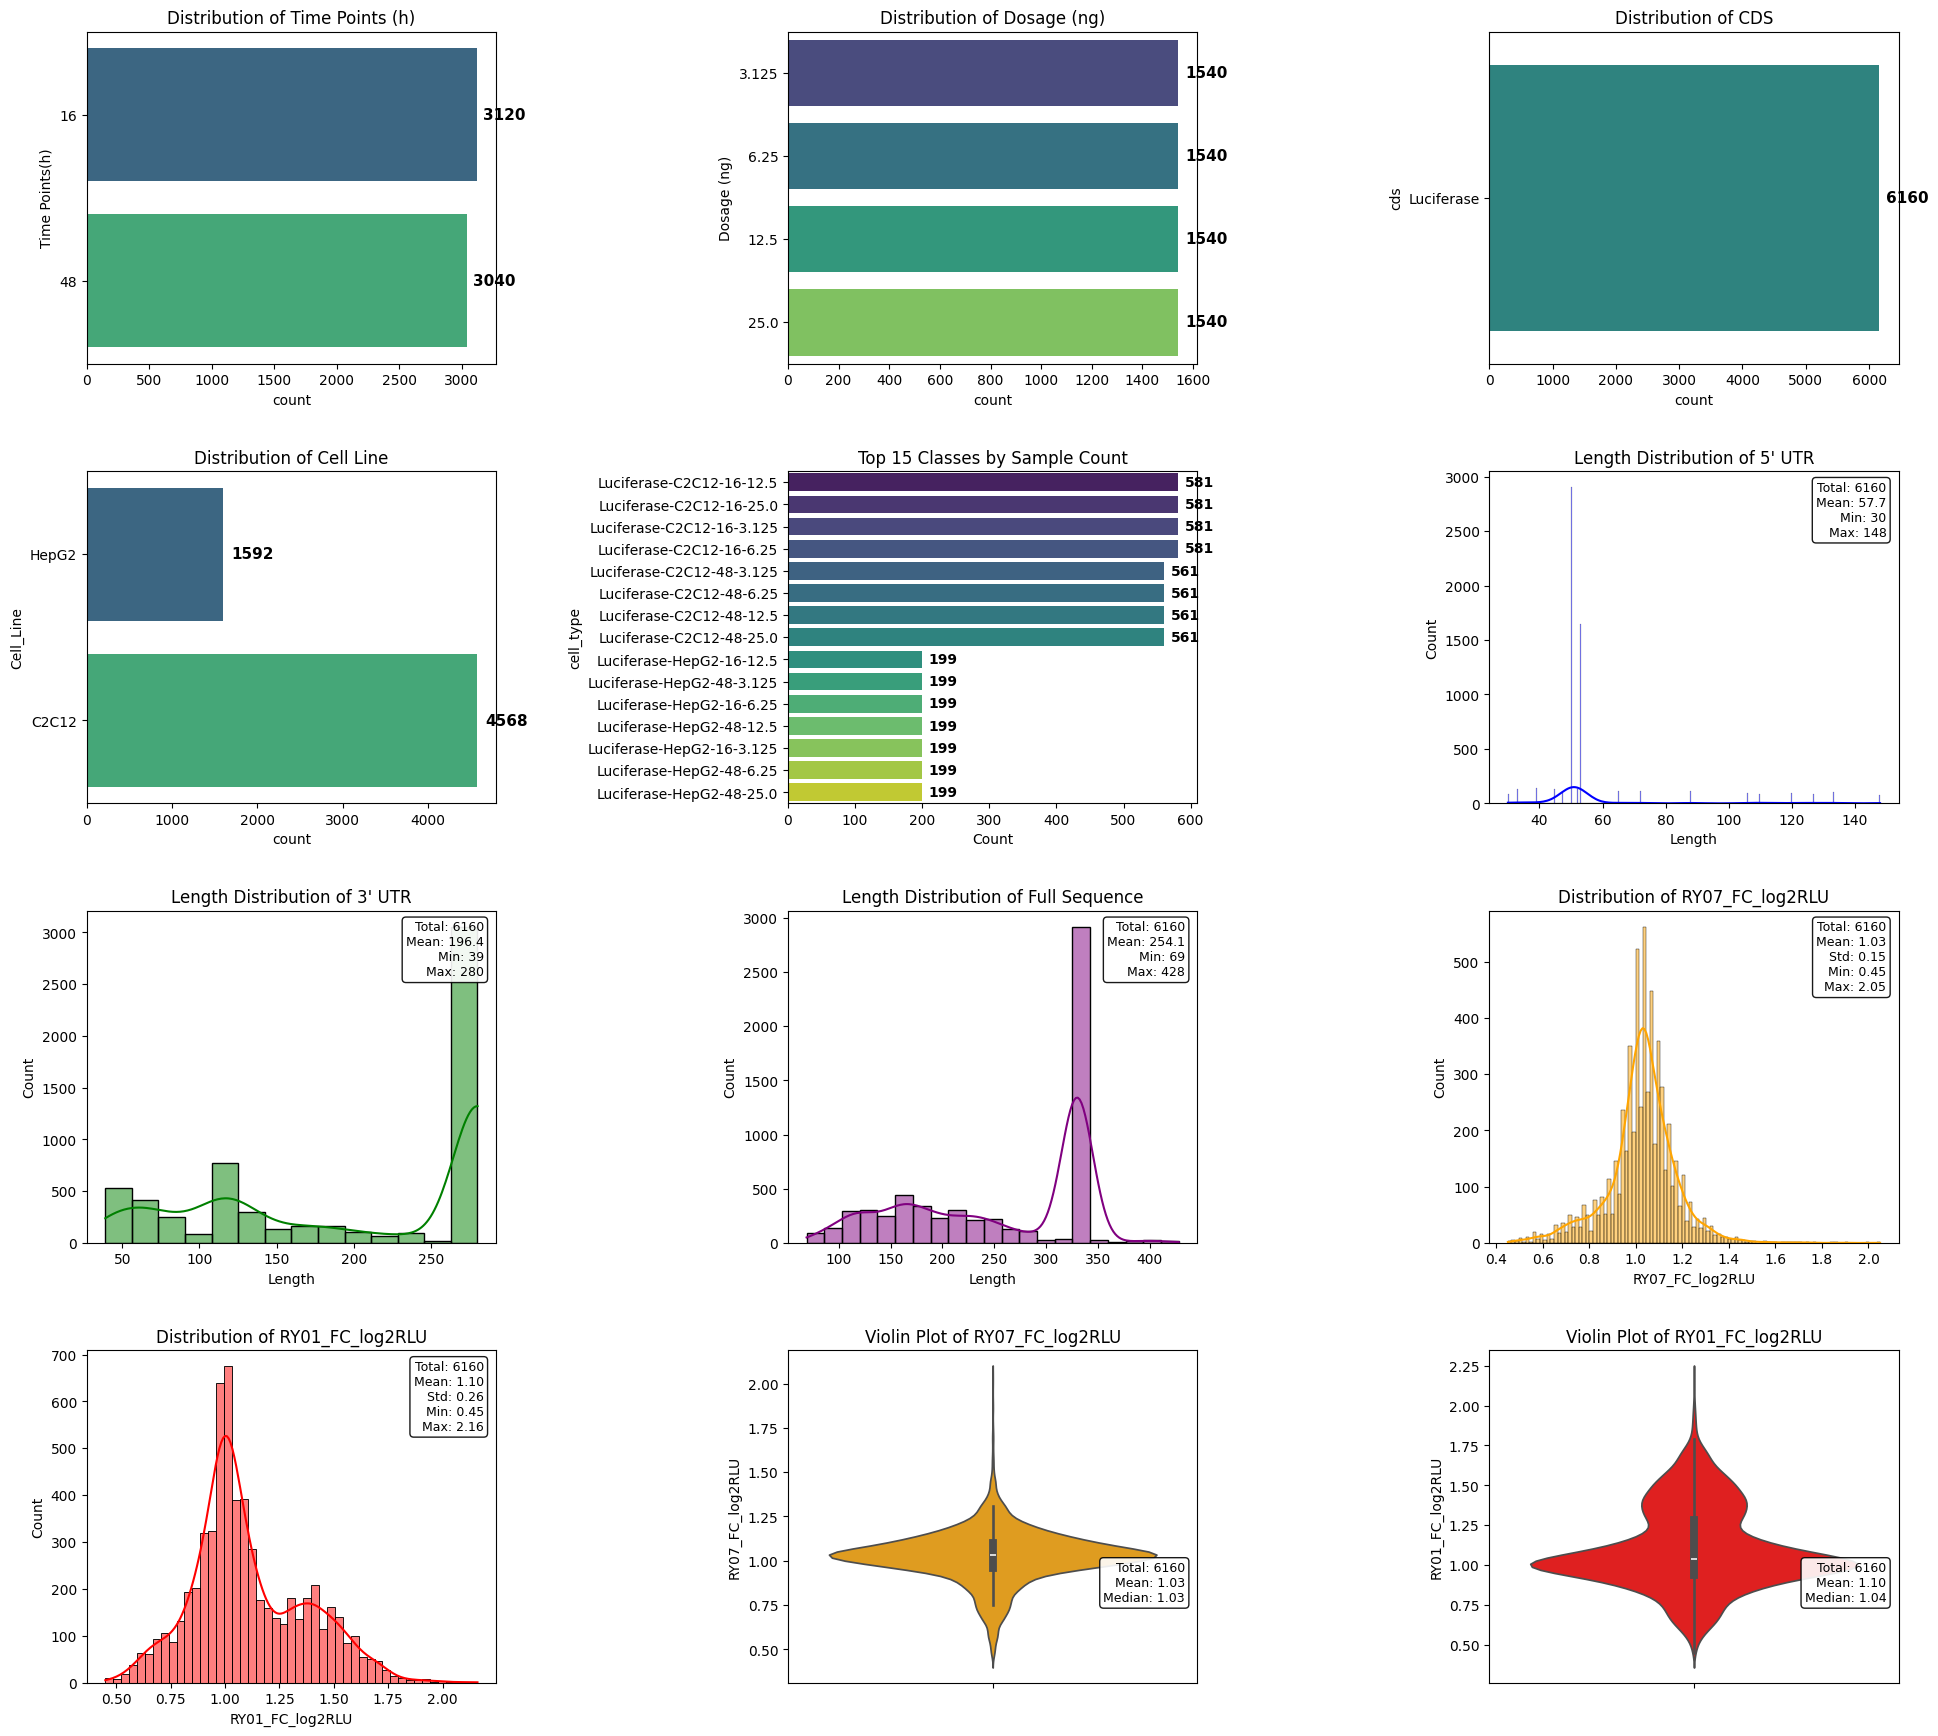

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设utr_luci已经是加载好的DataFrame
# 创建一个包含多个子图的大图
plt.figure(figsize=(20, 18))

# 1. 计数型变量: 'Time Points(h)', 'Dosage (ng)', 'cds', 'Cell_Line', 'class'
# Time Points(h)
plt.subplot(4, 3, 1)
ax = sns.countplot(y=utr_luci['Time Points(h)'], palette='viridis')
plt.title('Distribution of Time Points (h)')
# 在每个条形右侧添加计数 - 使用黑色文字，位置在条形外部
for p in ax.patches:
    count = int(p.get_width())
    ax.annotate(f'{count}', (p.get_width() + 50, p.get_y() + p.get_height()/2), 
               xytext=(0, 0), textcoords='offset points', va='center', fontweight='bold', color='black', fontsize=11)

# Dosage (ng)
plt.subplot(4, 3, 2)
ax = sns.countplot(y=utr_luci['Dosage (ng)'], palette='viridis')
plt.title('Distribution of Dosage (ng)')
# 在每个条形右侧添加计数 - 使用黑色文字
for p in ax.patches:
    count = int(p.get_width())
    ax.annotate(f'{count}', (p.get_width() + 30, p.get_y() + p.get_height()/2), 
               xytext=(0, 0), textcoords='offset points', va='center', fontweight='bold', color='black', fontsize=11)

# cds
plt.subplot(4, 3, 3)
ax = sns.countplot(y=utr_luci['cds'], palette='viridis')
plt.title('Distribution of CDS')
# 在每个条形右侧添加计数 - 使用黑色文字
for p in ax.patches:
    count = int(p.get_width())
    ax.annotate(f'{count}', (p.get_width() + 100, p.get_y() + p.get_height()/2), 
               xytext=(0, 0), textcoords='offset points', va='center', fontweight='bold', color='black', fontsize=11)

# Cell_Line
plt.subplot(4, 3, 4)
ax = sns.countplot(y=utr_luci['Cell_Line'], palette='viridis')
plt.title('Distribution of Cell Line')
# 在每个条形右侧添加计数 - 使用黑色文字
for p in ax.patches:
    count = int(p.get_width())
    ax.annotate(f'{count}', (p.get_width() + 100, p.get_y() + p.get_height()/2), 
               xytext=(0, 0), textcoords='offset points', va='center', fontweight='bold', color='black', fontsize=11)

# class (可能有很多不同值，取前15个最频繁的)
plt.subplot(4, 3, 5)
class_counts = utr_luci['cell_type'].value_counts().head(15)
ax = sns.barplot(x=class_counts.values, y=class_counts.index, palette='viridis')
plt.title('Top 15 Classes by Sample Count')
plt.xlabel('Count')
# 在每个条形右侧添加计数 - 使用黑色文字
for p in ax.patches:
    count = int(p.get_width())
    ax.annotate(f'{count}', (p.get_width() + 10, p.get_y() + p.get_height()/2), 
               xytext=(0, 0), textcoords='offset points', va='center', fontweight='bold', color='black', fontsize=10)

# 2. 长度分布: '5\' UTR', '3\' UTR', 'sequence'
# 5' UTR 长度 - 保持不变
plt.subplot(4, 3, 6)
utr5_lengths = utr_luci["5' UTR"].astype(str).apply(len)
ax = sns.histplot(utr5_lengths, kde=True, color='blue')
plt.title("Length Distribution of 5' UTR")
plt.xlabel('Length')
# 添加总数和均值信息
plt.annotate(f'Total: {len(utr5_lengths)}\nMean: {utr5_lengths.mean():.1f}\nMin: {utr5_lengths.min()}\nMax: {utr5_lengths.max()}', 
             xy=(0.97, 0.97), xycoords='axes fraction', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.9),
             ha='right', va='top', fontsize=9)

# 其余图表保持不变...
# 3' UTR 长度
plt.subplot(4, 3, 7)
utr3_lengths = utr_luci["3' UTR"].astype(str).apply(len)
ax = sns.histplot(utr3_lengths, kde=True, color='green')
plt.title("Length Distribution of 3' UTR")
plt.xlabel('Length')
# 添加总数和均值信息
plt.annotate(f'Total: {len(utr3_lengths)}\nMean: {utr3_lengths.mean():.1f}\nMin: {utr3_lengths.min()}\nMax: {utr3_lengths.max()}', 
             xy=(0.97, 0.97), xycoords='axes fraction', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.9),
             ha='right', va='top', fontsize=9)

# sequence 长度
plt.subplot(4, 3, 8)
seq_lengths = utr_luci['sequence'].astype(str).apply(len)
ax = sns.histplot(seq_lengths, kde=True, color='purple')
plt.title('Length Distribution of Full Sequence')
plt.xlabel('Length')
# 添加总数和均值信息
plt.annotate(f'Total: {len(seq_lengths)}\nMean: {seq_lengths.mean():.1f}\nMin: {seq_lengths.min()}\nMax: {seq_lengths.max()}', 
             xy=(0.97, 0.97), xycoords='axes fraction', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.9),
             ha='right', va='top', fontsize=9)

# 3. 标签分布: 'RY07_FC_log2RLU', 'RY01_FC_log2RLU'
# RY07_FC_log2RLU - 直方图
plt.subplot(4, 3, 9)
ax = sns.histplot(utr_luci['RY07_FC_log2RLU'], kde=True, color='orange')
plt.title('Distribution of RY07_FC_log2RLU')
# 添加统计信息
plt.annotate(f'Total: {utr_luci["RY07_FC_log2RLU"].count()}\nMean: {utr_luci["RY07_FC_log2RLU"].mean():.2f}\nStd: {utr_luci["RY07_FC_log2RLU"].std():.2f}\nMin: {utr_luci["RY07_FC_log2RLU"].min():.2f}\nMax: {utr_luci["RY07_FC_log2RLU"].max():.2f}', 
             xy=(0.97, 0.97), xycoords='axes fraction', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.9),
             ha='right', va='top', fontsize=9)

# RY01_FC_log2RLU - 直方图
plt.subplot(4, 3, 10)
ax = sns.histplot(utr_luci['RY01_FC_log2RLU'], kde=True, color='red')
plt.title('Distribution of RY01_FC_log2RLU')
# 添加统计信息
plt.annotate(f'Total: {utr_luci["RY01_FC_log2RLU"].count()}\nMean: {utr_luci["RY01_FC_log2RLU"].mean():.2f}\nStd: {utr_luci["RY01_FC_log2RLU"].std():.2f}\nMin: {utr_luci["RY01_FC_log2RLU"].min():.2f}\nMax: {utr_luci["RY01_FC_log2RLU"].max():.2f}', 
             xy=(0.97, 0.97), xycoords='axes fraction', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.9),
             ha='right', va='top', fontsize=9)

# RY07_FC_log2RLU - 小提琴图
plt.subplot(4, 3, 11)
ax = sns.violinplot(y=utr_luci['RY07_FC_log2RLU'], color='orange')
plt.title('Violin Plot of RY07_FC_log2RLU')
# 添加统计信息
plt.annotate(f'Total: {utr_luci["RY07_FC_log2RLU"].count()}\nMean: {utr_luci["RY07_FC_log2RLU"].mean():.2f}\nMedian: {utr_luci["RY07_FC_log2RLU"].median():.2f}', 
             xy=(0.97, 0.3), xycoords='axes fraction', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.9),
             ha='right', va='center', fontsize=9)

# RY01_FC_log2RLU - 小提琴图
plt.subplot(4, 3, 12)
ax = sns.violinplot(y=utr_luci['RY01_FC_log2RLU'], color='red')
plt.title('Violin Plot of RY01_FC_log2RLU')
# 添加统计信息
plt.annotate(f'Total: {utr_luci["RY01_FC_log2RLU"].count()}\nMean: {utr_luci["RY01_FC_log2RLU"].mean():.2f}\nMedian: {utr_luci["RY01_FC_log2RLU"].median():.2f}', 
             xy=(0.97, 0.3), xycoords='axes fraction', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.9),
             ha='right', va='center', fontsize=9)

# 设置整体布局并显示图形
plt.tight_layout(pad=3.0)
# plt.show()
plt.savefig('vMay14_luciferase_screening_summary_log2.png')


In [39]:
utr_luci

,rvac_ID,Molecule,Batch_date,Plate,Time Points(h),Dosage (ng),source,RLU_AVG,RLU_SD,RLU_CV,...,5' UTR,3' UTR,exists_in_utr_luci,class,full_sequence,is_train,is_test,is_val,cell_type,sequence
0,RV-UML-m379,379,20221021,18,48,6.25,NaN,12960,2480,0.19,...,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,TGAAGACTTTCCATCAAGGTAATGCACTTAATGCTTTATGTGAGAT...,True,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,True,False,False,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...
1,RV-UML-m390,390,20221021,18,48,6.25,NaN,9820,2900,0.30,...,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,AATATTAATTTATAAAAAAGAAATTTTAAAAAGTAACAAGAAAGAA...,True,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,True,False,False,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...
2,RV-UML-m392,392,20221021,18,48,6.25,NaN,10060,1100,0.11,...,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,CCCCGTCTGCTCCTCTAGGCTGGCCCCTTGTCCACCCCTCTCCACA...,True,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,True,False,False,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...
3,RV-UML-m381,381,20221021,18,48,6.25,NaN,6880,280,0.04,...,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,TCACCCTCGGTGCTTCCTCTGTCTCCTCTTTCTCCCTGGCCTGTGG...,True,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,True,False,False,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...
4,RV-UML-m386,386,20221021,18,48,6.25,NaN,6820,900,0.13,...,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,ATACTCCCGGCCAGGGCCTGTCCCAGTTATGTGCCTTCCCTCAAGC...,True,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...,True,False,False,Luciferase-HepG2-48-6.25,AGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,RV-UML-m213,213,20221007,1,16,6.25,NaN,100,20,0.20,...,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...,AAAAAGTGTGTATTAGGAGGAGAGAGAGGAAAAAAAGAGGAAA,True,Luciferase-C2C12-16-6.25,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...,True,False,False,Luciferase-C2C12-16-6.25,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...
6156,RV-UML-m213,213,20221007,9,48,12.50,NaN,40,0,0.00,...,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...,AAAAAGTGTGTATTAGGAGGAGAGAGAGGAAAAAAAGAGGAAA,True,Luciferase-C2C12-48-12.5,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...,True,False,False,Luciferase-C2C12-48-12.5,AGAAGATGAAGCCTGAACTGATTATAAAACCTTCCTTGGCTCAGTG...
6157,RV-UML-m268,268,20221007,6,16,25.00,NaN,640,200,0.31,...,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...,GCCCTGGAACTCCTAAACCTTTGCCCCTGGGGCTTCCATCCCAACC...,True,Luciferase-C2C12-16-25.0,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...,True,False,False,Luciferase-C2C12-16-25.0,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...
6158,RV-UML-m268,268,20221007,6,16,12.50,NaN,220,60,0.27,...,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...,GCCCTGGAACTCCTAAACCTTTGCCCCTGGGGCTTCCATCCCAACC...,True,Luciferase-C2C12-16-12.5,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...,True,False,False,Luciferase-C2C12-16-12.5,AGCCGTCTCCGCCTCGCCGCAGTCGGGGCAGCCGCTCGCCCCTCTT...


In [40]:
utr_luci.to_csv('./UTR_sequences/vMay14_luciferase_screening_summary_log2.csv')